In [3]:
import pandas as pd
import numpy as np

In [4]:
DF = pd.read_csv('PreparedData.csv')
DF

,password,len_of_pswd,is_digit,is_char,is_upper,is_special_characters,strength
0,kzde5577,8,1,1,0,0,1
1,kino3434,8,1,1,0,0,1
2,visi7k1yr,9,1,1,0,0,1
3,megzy123,8,1,1,0,0,1
4,lamborghin1,11,1,1,0,0,1
...,...,...,...,...,...,...,...
669286,10redtux10,10,1,1,0,0,1
669287,infrared1,9,1,1,0,0,1
669288,184520socram,12,1,1,0,0,1
669289,marken22a,9,1,1,0,0,1


In [20]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
DF[['len_of_pswd']] = mms.fit_transform(DF[['len_of_pswd']])
DF

,password,len_of_pswd,is_digit,is_char,is_upper,is_special_characters,strength
0,kzde5577,0.031963,1,1,0,0,1
1,kino3434,0.031963,1,1,0,0,1
2,visi7k1yr,0.036530,1,1,0,0,1
3,megzy123,0.031963,1,1,0,0,1
4,lamborghin1,0.045662,1,1,0,0,1
...,...,...,...,...,...,...,...
669286,10redtux10,0.041096,1,1,0,0,1
669287,infrared1,0.036530,1,1,0,0,1
669288,184520socram,0.050228,1,1,0,0,1
669289,marken22a,0.036530,1,1,0,0,1


In [21]:
import sklearn as sk
from sklearn import svm
from sklearn.model_selection import train_test_split
data = DF.loc[:, DF.columns != "password"]

X, y = data.loc[:, data.columns != "strength"], data["strength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

SVM = svm.SVC(decision_function_shape="ovo").fit(X_train, y_train)
SVM.predict(X_test)
SVM.score(X_test, y_test)

0.9953546704577868

In [28]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

svm_predict = SVM.predict(X_test)
cm = confusion_matrix(y_test, svm_predict)

# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, svm_predict))
# Printing the confusion matrix
print(cm)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29258
           1       1.00      1.00      1.00    164320
           2       0.99      1.00      0.99     27289

    accuracy                           1.00    220867
   macro avg       0.99      0.99      0.99    220867
weighted avg       1.00      1.00      1.00    220867



array([[ 28646,    604,      8],
       [    10, 163923,    387],
       [     0,     17,  27272]], dtype=int64)

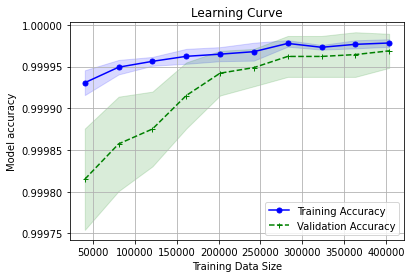

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline

pipeline = make_pipeline(StandardScaler(),
                        svm.SVC(decision_function_shape="ovo").fit(X_train, y_train))
#
# Use learning curve to get training and test scores along with train sizes
#
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10),
                                                     n_jobs=1)
#
# Calculate training and test mean and std
#
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
#
# Plot the learning curve
#
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()